<a href="https://colab.research.google.com/github/Luis321Leo/Reconocimiento_caracteres_IH/blob/main/Caracteres_manuscritos_IH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from keras.utils import to_categorical



from keras.layers import Dense, Activation, Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

from PIL import Image
from torchvision import transforms
import PIL.ImageOps

In [6]:
import pandas as pd

# Now you can use pd to refer to the pandas library
data = pd.read_csv('train.csv')


In [7]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
data.count()

label       36138
pixel0      36138
pixel1      36138
pixel2      36138
pixel3      36138
            ...  
pixel779    36137
pixel780    36137
pixel781    36137
pixel782    36137
pixel783    36137
Length: 785, dtype: int64

In [9]:
data.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,36138.000000,36138.0,36138.0,36138.0,36138.0,36138.0,36138.0,36138.0,36138.0,36138.0,...,36137.000000,36137.000000,36137.000000,36137.000000,36137.000000,36137.000000,36137.0,36137.0,36137.0,36137.0
mean,4.461481,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.230401,0.119019,0.061128,0.022996,0.020035,0.003321,0.0,0.0,0.0,0.0
std,2.887256,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.490946,4.589808,3.379197,1.895150,2.042399,0.446607,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.000000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [10]:
data.dtypes

label         int64
pixel0        int64
pixel1        int64
pixel2        int64
pixel3        int64
             ...   
pixel779    float64
pixel780    float64
pixel781    float64
pixel782    float64
pixel783    float64
Length: 785, dtype: object

In [11]:
data.shape

(36138, 785)

<Axes: xlabel='label', ylabel='count'>

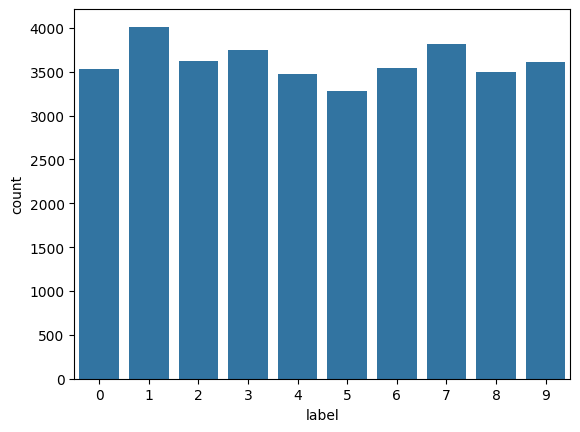

In [14]:
import seaborn as sns
sns.countplot(x=data.label)